# Question 1
a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [1]:
# iMPORTING Important libraries
# data processing
import numpy as np 
import pandas as pd  
import os

# read the data 
Shopify_df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [2]:
Shopify_df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

By using panda's describe() method on the data frame.
It shows that the mean order amount is 3,145.13.
Also, there is a large standard deviation of 41282.54.
This implies that on average, the values vary 41,282.54 from the mean.
This makes the mean not a perfect representation of the AOV



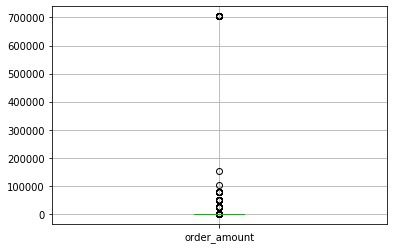

In [4]:
#Let's plot a boxplot to understand the distribution better

Shopify_df.boxplot(column='order_amount')

It seems there are lots of outliers,the entire box portion of the box plot is a line along 0

In [5]:
#Grouping the data by order amount, counting the number of entries for each group, and sort it in descending order.
#This will help identify the outliers


unique_amounts = Shopify_df.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
unique_amounts.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


 There are some high order amounts are repeated, especially 704000, 51450, and 25725

In [7]:
Shopify_df.loc[Shopify_df['order_amount'].isin([704000, 51450, 25725])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00


The order amounts of 704000 occur at the same time each day between the same store and users. 
The data for order amounts of 51450 and 25725 similar. 
It seems orders of 51450 are just transactions that bought two items worth 25725 as they all come from the same store id 78.
For the 704000 amounts, it seems like the transactions are probably some sort of supplier purchasing many shoes at once since the order amount is consistently 2000.

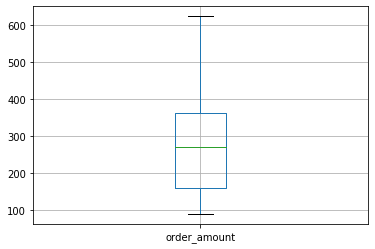

In [9]:
#plotting only values that are the median +/- 1.5 times the interquartile range.
q1 = Shopify_df.order_amount.quantile(q=0.25)
q2 = Shopify_df.order_amount.quantile(q=0.5)
q3 = Shopify_df.order_amount.quantile(q=0.75)
IQR = q3 - q1

Shopify_df_truncated = Shopify_df[(Shopify_df.order_amount < q2 + IQR * 1.5) & (Shopify_df.order_amount > q2 - IQR * 1.5)]
Shopify_df_truncated.boxplot(column='order_amount')

In [10]:
Shopify_df_truncated.order_amount.describe()

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

# Question 1
b. What metric would you report for this dataset?

Looking at the box plot for Shopify_df_truncated it looks like the distribution is skewed towards lower values. 
I would report the median value of the truncated dataset. 
The values above the median will increase the mean a disproportionate amount.

# Question 1
c. What is its value?

In [ ]:
We can determine this value by using the Shopify_df_truncated.order_amount.describe() function to find that it $272.
It also shows that the standard deviation is 132.06.

# Question 2
a.How many orders were shipped by Speedy Express in total?

Ans : Using the query below, the output shows the number of orders is 54.

In [ ]:
#By joining the [Orders] and [Shippers] tables on ShipperID, 
#I filtered table by orders performed by Speedy Express and counted the entries.

SELECT COUNT(*) AS NumberOfOrders
FROM [Orders]
JOIN [Shippers]
    ON [Shippers].ShipperID = [Orders].ShipperID
WHERE [Shippers].ShipperName = 'Speedy Express'

Using the above query, the output shows the number of orders is 54.

In [ ]:
Using the above query, the output shows the number of orders is 54.

# Question 2
b.What is the last name of the employee with the most orders?

Ans: Using the query below shows that the employee with the last name Peacock had the most orders at 40.

In [ ]:
#Here I counted the number of orders in [Orders] and group by EmployeeID. 
#This returned which employee ID has the most orders, but not that employee's last name.
#Then I used the JOIN expression to merge the [Orders] table and the [Employees] to match
#the employees to their employee ID and group by their last name to solve the problem.

SELECT [Employees].LastName, COUNT(*) AS NumberOfOrders
FROM [Orders]
JOIN [Employees]
ON [Orders].EmployeeID = [Employees].EmployeeID
GROUP BY [Employees].LastName
ORDER BY NumberOfOrders DESC
LIMIT 1

Using the query above shows that the employee with the last name Peacock had the most orders at 40.

In [ ]:
Using the query above shows that the employee with the last name Peacock had the most orders at 40.

# Question 2
c.What product was ordered the most by customers in Germany?

Ans: This final query below shows that Boston Crab Meat has the most orders at 160 total orders

In [ ]:
#This gives us a list of all orders to customers in Germany.

SELECT [Orders].OrderID,
    [Customers].Country
FROM [Orders]
JOIN [Customers]
    ON [Customers].CustomerID = [Orders].CustomerID
WHERE [Customers].Country = 'Germany'

#To determine which item was ordered the most.
SELECT [Customers].Country,
    [OrderDetails].ProductID,
    SUM([OrderDetails].Quantity) AS "TotalOrdered"
FROM [Orders]
JOIN [Customers]
    ON [Customers].CustomerID = [Orders].CustomerID
JOIN [OrderDetails]
    ON [OrderDetails].OrderID = [Orders].OrderID
WHERE [Customers].Country = 'Germany'
GROUP BY [OrderDetails].ProductID
ORDER BY TotalOrdered DESC
#The most ordered item has a product ID of 40 at 160 orders


SELECT [Products].ProductName,
    SUM([OrderDetails].Quantity) AS "TotalOrdered"
FROM [Orders]
JOIN [Customers]
    ON [Customers].CustomerID = [Orders].CustomerID
JOIN [OrderDetails]
    ON [OrderDetails].OrderID = [Orders].OrderID
JOIN [Products]
    ON [Products].ProductID = [OrderDetails].ProductID
WHERE [Customers].Country = 'Germany'
GROUP BY [OrderDetails].ProductID
ORDER BY TotalOrdered DESC 

This final query shows that Boston Crab Meat has the most orders at 160 total orders

In [ ]:
This final query shows that Boston Crab Meat has the most orders at 160 total orders